# **Halloween Challenge**

Maven Analytics  
John Michael Javier

## About this Project

This is my take on Maven Analytics Halloween Challenge. And also, my first time joining the challenge. 

## Problem Statement
"Find the **3 treats** you'll give out on Halloween to guarantee that trick-or-treaters of **all tastes** find something they'll love and will make you the **most popular house on the block.**"

## Loading packages

In [282]:
library(tidyverse)

## Uploading data

In [ ]:
df <- read.csv('/Users/michaeljavier/Desktop/Portfolio/Maven Analytics Challenges/Halloween/candy-data.csv')

## Reviewing the data
I have to check what kind of variables I'll be working with. g

In [ ]:
glimpse(df)

*Note: The definition on each variable has been provided by Maven in a separate file.*

## Data Wrangling

I updated the data frame by grouping the variables as I deemed fit so it'll be easier for me to navigate the data later. I've created new columns based on these groupings: 

- **type:** *(combined "chocolate" & "fruity")*
    - is the candy a chocolate, fruit-flavored, both or neither?
- **with_nuts:**
    - does it contain any form of nuts?
- **filling:** *(combined caramel, nougat & crispedricewafer)*
    - what kind of filling does it have? caramel, nougat, crisped rice/wafer or just a regular candy?
- **texture:**
    - is it hard? or soft?
- **form:**
    - is it a bar? or not?
- **packaging:** *(renamed pluribus)*
    - is it packaged individually? or in a bag/box?
 
For all new columns, if the item is not applicable, the result will be null except in "texture", where the result if not "hard", will be "soft".

In [205]:
df2 <- df %>% 
  mutate(type = 
           if_else(chocolate == '1' & fruity == '0', "chocolate",
           if_else(chocolate == '0' & fruity == '1', "fruit-flavored", 
           if_else(chocolate == '1' & fruity == '1', "chocolate and fruit",
                   "")))) %>% 
  mutate(with_nuts = 
           if_else(peanutyalmondy == '1', "nutty", "")) %>%  
  mutate(filling = 
           if_else(caramel == '1' & nougat == '1' & crispedricewafer == '1', "candy with caramel, nougat and crisped rice/wafer",
           if_else(caramel == '1' & nougat == '0' & crispedricewafer == '0', "candy with caramel",
           if_else(caramel == '0' & nougat == '1' & crispedricewafer == '0', "candy with nougat",
           if_else(caramel == '0' & nougat == '0' & crispedricewafer == '1', "candy with crisped rice/wafer",
           if_else(caramel == '1' & nougat == '1' & crispedricewafer == '0', "candy with caramel and nougat",
           if_else(caramel == '1' & nougat == '0' & crispedricewafer == '1', "candy with caramel and crisped rice/wafer",
           if_else(caramel == '0' & nougat == '1' & crispedricewafer == '1', "candy with nougat and crisped rice/wafer",
                   "regular candy")))))))) %>% 
  mutate(texture = 
           if_else(hard == '1', "hard", "soft"))  %>% 
  mutate(form = 
           if_else(bar == '1', "bar", "non-bar"))  %>% 
  mutate(packaging = 
           if_else(pluribus == '1', "in a bag/box", "in a single-pack")) 

## Reviewing the new data frame

In [207]:
glimpse(df2)

Rows: 85
Columns: 19
$ competitorname   <chr> "100 Grand", "3 Musketeers", "One dime", "One quarter…
$ chocolate        <int> 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ fruity           <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,…
$ caramel          <int> 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,…
$ peanutyalmondy   <int> 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nougat           <int> 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ crispedricewafer <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ hard             <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,…
$ bar              <int> 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ pluribus         <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,…
$ sugarpercent     <dbl> 0.732, 0.604, 0.011, 0.011, 0.906, 0.465, 0.604, 0.31…
$ pricepercent     <dbl> 0.860, 0.511, 0.116, 0.511, 0.511, 0.767, 0.767, 0.51…
$ winpercent       

Renamed the variable **competitorname** to **brand**.
Reordered the columns. 
Removed all unnecessary variables. 

Added three numerical variables back from the original table.
- **sugarpercent:** The percentile of sugar it falls under within the data set.
- **pricepercent:** The unit price percentile compared to the rest of the set.
- **winpercent:** The overall win percentage according to 269,000 matchups.

*Note: The definition above was taken from the other file from Maven.*

In [209]:
df3 <- df2  %>% 
  rename(brand = competitorname) %>%
  select(brand,
         texture,
         with_nuts,
         type,
         form,
         filling,
         packaging,
         sugarpercent,
         pricepercent,
         winpercent)

## Converting Values and Creating a new table

I converted **sugarpercent** and **pricepercent** to percentage values and rounded off **winpercent.**

In [211]:
df3$sugarpercent <- df3$sugarpercent * 100
df3$pricepercent <- df3$pricepercent * 100
df3$winpercent <- round(df3$winpercent, digits = 2)

I added a new column called **description** that would unite all new columns' values into single column. 
I reordered all fo the columns I wanted and replaced all null values with their appropriate values. 

In [213]:
candy <- df3 %>% 
  mutate(description = 
           paste(texture, with_nuts, type, form, filling, packaging, sep = " ")) %>% 
  mutate(description = trimws(gsub("\\s+", " ", description))) %>% 
  select(brand,
         texture,
         with_nuts,
         type,
         form,
         filling,
         packaging,
         description,
         sugarpercent,
         pricepercent,
         winpercent) %>% 
  mutate(with_nuts = 
           if_else(with_nuts == "", "without nuts", "with nuts")) %>% 
  mutate(type = 
           if_else(type == "", "unspecified", type))

Let's review the new table **candy.**

In [215]:
glimpse(candy)

Rows: 85
Columns: 11
$ brand        <chr> "100 Grand", "3 Musketeers", "One dime", "One quarter", "…
$ texture      <chr> "soft", "soft", "soft", "soft", "soft", "soft", "soft", "…
$ with_nuts    <chr> "without nuts", "without nuts", "without nuts", "without …
$ type         <chr> "chocolate", "chocolate", "unspecified", "unspecified", "…
$ form         <chr> "bar", "bar", "non-bar", "non-bar", "non-bar", "bar", "ba…
$ filling      <chr> "candy with caramel and crisped rice/wafer", "candy with …
$ packaging    <chr> "in a single-pack", "in a single-pack", "in a single-pack…
$ description  <chr> "soft chocolate bar candy with caramel and crisped rice/w…
$ sugarpercent <dbl> 73.2, 60.4, 1.1, 1.1, 90.6, 46.5, 60.4, 31.3, 90.6, 60.4,…
$ pricepercent <dbl> 86.0, 51.1, 11.6, 51.1, 51.1, 76.7, 76.7, 51.1, 32.5, 32.…
$ winpercent   <dbl> 66.97, 67.60, 32.26, 46.12, 52.34, 50.35, 56.91, 23.42, 3…


*Note: This will be my base table for my analysis*

## Initial Analysis
Let's go back to the **problem statement:** 

"Find the **3 treats** you'll give out on Halloween to guarantee that trick-or-treaters of **all tastes** find something they'll love and will make you the **most popular house on the block.**"

I'm not sure how to proceed yet, so my initial thought is to play around with the data first and see what I will find.

### **A. Filtering Numerical Variables**
I decided to check the top 3 candies by filtering per numerical variable below: 

- highest **winpercent**
- lowest **sugarpercent**
- lowest **pricepercent**

#### **Why did I do it this way?**
My initial thought is that the higher the winpercent is, the more popular it is. Lowest sugarpercent would be the healthiest choice. And lowest pricepercent will keep our pockets checked. 

#### **Top 3 candies with highest win percentage**

In [217]:
candy %>% 
  arrange(desc(winpercent)) %>% 
  select(brand, winpercent, description) %>% 
  head(3)

,brand,winpercent,description
,<chr>,<dbl>,<chr>
1,Reese's Peanut Butter cup,84.18,soft nutty chocolate non-bar regular candy in a single-pack
2,Reese's Miniatures,81.87,soft nutty chocolate non-bar regular candy in a single-pack
3,Twix,81.64,soft chocolate bar candy with caramel and crisped rice/wafer in a single-pack


#### **Top 3 candies with lowest sugar percentage**

In [219]:
candy %>% 
  arrange(sugarpercent) %>% 
  select(brand, sugarpercent, description) %>% 
  head(3)

,brand,sugarpercent,description
,<chr>,<dbl>,<chr>
1,One dime,1.1,soft non-bar regular candy in a single-pack
2,One quarter,1.1,soft non-bar regular candy in a single-pack
3,Reese's Miniatures,3.4,soft nutty chocolate non-bar regular candy in a single-pack


#### **Top 3 candies with lowest price percentage**

In [221]:
candy %>% 
  arrange(pricepercent) %>% 
  select(brand, pricepercent, description) %>% 
  head(3)

,brand,pricepercent,description
,<chr>,<dbl>,<chr>
1,Tootsie Roll Midgies,1.1,soft chocolate non-bar regular candy in a bag/box
2,Pixie Sticks,2.3,soft non-bar regular candy in a bag/box
3,Dum Dums,3.4,hard fruit-flavored non-bar regular candy in a single-pack


*Based on this simple view, I've noticed that **Reese's Miniatures** falls within the highest winpercentage and lowest sugarpercent.*

### **B. Rank then Filter per numerical Variable**
Let's check again if it will be the same observation if I do the filtering based on the same conditions, but this time, I will rank each variable first then filter each one. 

- Identify the **top 20** candies with **highest winpercent**
- From the top 10 candies, filter the **top 10** with **lowest sugarpercent**
- From the top 5, filter the **top 3** with **lowest pricepercent**

#### **Why did I do it this way?**
- **By filtering the top 20 highest winpercentage,** I would have a list of candies that are most popular and well-received.
- **By filtering the top 10 lowest sugarpercentage,** I would know which ones are the healthiest.
- **By filtering the top 3 lowest pricepercentage,** * would know which ones are the cheapest. 

In [223]:
candy %>% 
  arrange(desc(winpercent)) %>% 
  slice_head(n = 20) %>% 
    arrange(sugarpercent) %>% 
    slice_head(n = 10) %>% 
      arrange(pricepercent) %>% 
      slice_head(n = 3) %>% 
        select(brand, winpercent, sugarpercent, pricepercent, description) %>% 
        arrange(desc(winpercent))

brand,winpercent,sugarpercent,pricepercent,description
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Reese's Miniatures,81.87,3.4,27.9,soft nutty chocolate non-bar regular candy in a single-pack
Kit Kat,76.77,31.3,51.1,soft chocolate bar candy with crisped rice/wafer in a single-pack
Starburst,67.04,15.1,22.0,soft fruit-flavored non-bar regular candy in a bag/box


*Now this is interesting, **Reese's Miniatures** still ranked **1st** among the candies, but I'm still not sure this is what I'm looking for. I'll try with a different perspective.*

### **C. Highest Winpercent per Categorical Variable**
Let's check each categorical variables' highest winpercent,

- texture
- with-nuts
- type
- form
- filling
- packaging

And use each winning categorical variables' winpercent value to look fo the candy that falls within that description.

#### **Texture**

In [225]:
candy %>% 
  group_by(texture) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

texture,Win %
<chr>,<dbl>
hard,40.51
soft,52.42


#### **With_Nuts**

In [227]:
candy %>% 
  group_by(with_nuts) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

with_nuts,Win %
<chr>,<dbl>
with nuts,63.70
without nuts,47.68


#### **Type**

In [229]:
candy %>% 
  group_by(type) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

type,Win %
<chr>,<dbl>
chocolate,61.25
chocolate and fruit,48.98
fruit-flavored,43.99
unspecified,35.93


#### **Form**

In [231]:
candy %>% 
  group_by(form) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

form,Win %
<chr>,<dbl>
bar,61.30
non-bar,46.71


#### **Filling**

In [233]:
candy %>% 
  group_by(filling) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

filling,Win %
<chr>,<dbl>
candy with caramel,46.75
candy with caramel and crisped rice/wafer,69.38
candy with caramel and nougat,66.87
candy with crisped rice/wafer,63.76
candy with nougat,50.96
regular candy,47.91


#### **Packaging**

In [235]:
candy %>% 
  group_by(packaging) %>% 
  summarise("Win %" = round(mean(winpercent), digits = 2))

packaging,Win %
<chr>,<dbl>
in a bag/box,46.82
in a single-pack,54.07


Let's take a look at the results per categorical variable: 

- **texture:** *soft*
- **with_nuts:** *with nuts*
- **type:** *chocolate*
- **form:** *bar*
- **filling:** *candy with caramel and crisped rice/wafer*
- **packaging:** *in a single-pack*

Next step is to identify a candy that falls with this description.
***soft nutty chocolate bar candy with caramel and crisped rice/wafer in a single-pack***

In [237]:
candy %>%
  filter(description == "soft nutty chocolate bar candy with caramel and crisped rice/wafer in a single-pack") %>%
  group_by(brand, winpercent, 
           sugarpercent, 
           pricepercent,
           description) %>%
  summarise(total = n(), .groups = "drop")


brand,winpercent,sugarpercent,pricepercent,description,total
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Snickers Crisper,59.53,60.4,65.1,soft nutty chocolate bar candy with caramel and crisped rice/wafer in a single-pack,1


The result showed only one candy with that description, **Snickers Crisper.**

*This is interesting as the* **winpercent, sugarpercent** *and* **pricepercent** *are all at the* **mid level.** 

**This gets me thinking:**
*"What's the relationship between sugarpercent and pricepercent?"*

### **D. Refined Analysis**
Let's plot **sugarpercent** and **pricepercent** on a *scatterplot.*

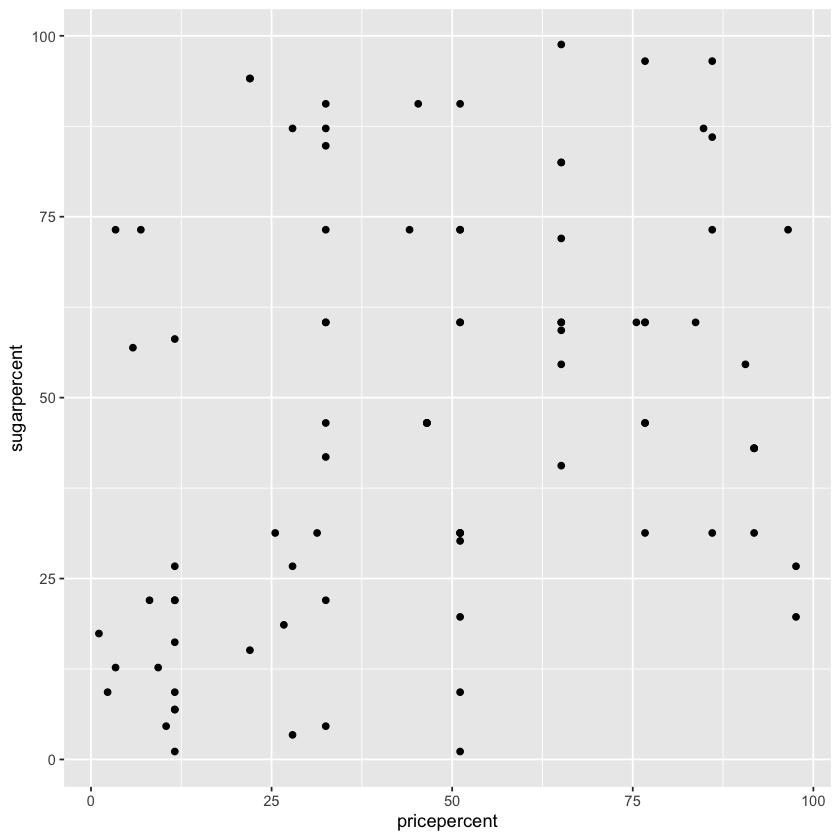

In [239]:
candy %>% 
  ggplot(aes(pricepercent, sugarpercent)) +
  geom_point()

I'm considering categorizing each candy based on its position within  a **quadrant.**

#### **How do we do the groupings?**
For **sugarpercent,** I will use **Healthy** for values below 50 and **Unhealthy** for values 50 and above. Similarly, for **pricepercent,** the categories would be **Inexpensive** for values below 50 and **Expensive** for values 50 and above. 

Let's create a new table that includes these categories with the following columns: 
- **sugar_reco:** for the sugar category
- **price_reco:** for the price category
- **quadrant:** a column combining these 2 categories.

In [241]:
candy_group <- candy %>% 
  mutate(sugar_reco = 
           if_else(sugarpercent >= 50,"Unhealthy", "Healthy")) %>% 
  mutate(price_reco =
           if_else(pricepercent >= 50, "Expensive", "Inexpensive")) %>% 
  mutate(quadrant =
           case_when(sugarpercent >= 50 & pricepercent >= 50 ~ "Unhealthy and Expensive", 
                     sugarpercent >= 50 & pricepercent < 50 ~ "Unhealthy but Inexpensive",
                     sugarpercent < 50 & pricepercent >= 50 ~ "Healthy and Expensive",
                     sugarpercent < 50 & pricepercent < 50 ~ "Healthy and Inexpensive"))

Let's visualize the quadrant

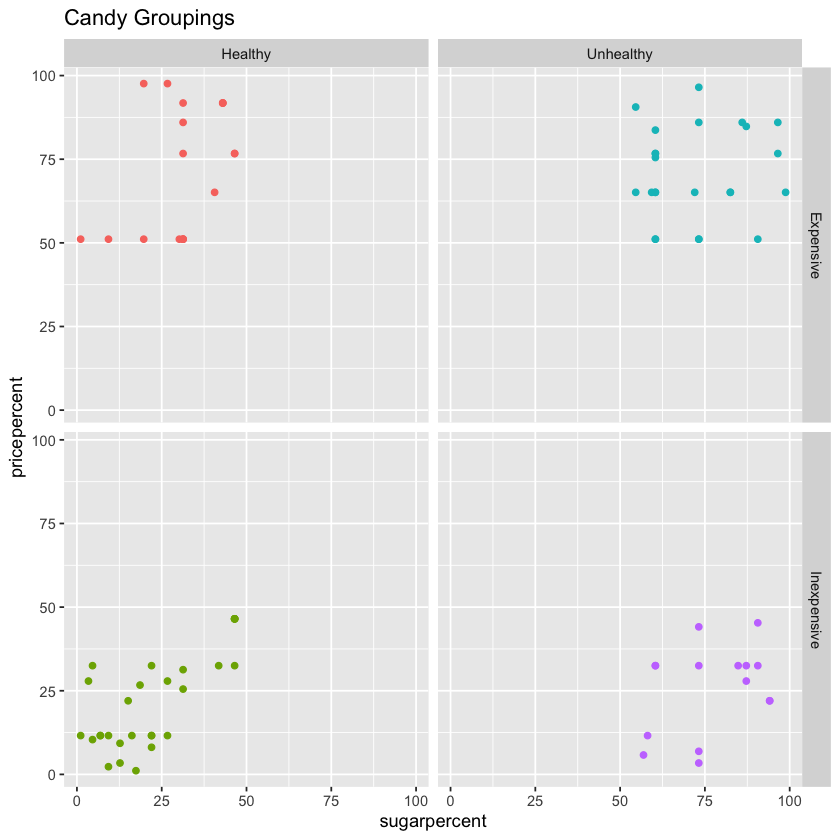

In [243]:
candy_group %>% 
  ggplot(aes(sugarpercent, pricepercent, colour = quadrant)) +
  geom_point() +
  facet_grid(price_reco ~ sugar_reco) +
  labs(title = "Candy Groupings") + 
  theme(legend.position = "None")

Now this is interesting, I now have 4 groups and I have to decide which one to use.

- **Healthy and Expensive**
- **Healthy and Inexpensive**
- **Unhealthy and Expensive**
- **Unhealthy and Inexpensive**

Let's go back to the **problem statement** and break it down to parts. 

"Find the **3 treats** you'll give out on Halloween to guarantee that trick-or-treaters of **all tastes** find something they'll love and will make you the **most popular house on the block.**"

- Find the **3 treats**
- Guarantee that **all tastes** find something
- Become the **most popular treat-or-treating house** on the block

I'll focus on the 3rd item first so I will be able to choose which quadrant to go for. 

#### ***How can you become the most popular house in the block?***

To answer this question, we need to accomplish 2 things: 

- appeal to the **taste of the children**
- appeal to the **taste of the parents/guardians**

#### **How do we do this?**
- **For the children,** we need to find the **best tasting** *= highest winpercent*
- **For the parents,** we need to find 2 things:
    - **most expensive** candies will give you a strong status within your neighborhood as the person who gives out expensive candies. *=highest pricepercent*
    - **healthiest** candies will also bring more fame to your house as you promote and prioritize health. *=lowest sugarpercent*

### **Lowest sugarpercent & Highest pricepercent** = Healthy & Expensive

Let's check how many candies fall under **Healthy & Expensive** compared with the other quadrant.

In [245]:
candy_group %>% 
  group_by(quadrant) %>% 
  summarise("Total Count" = n(),
           "Win% Mean" = round(mean(winpercent), digits = 2),
           "Sugar% Mean" = round(mean(sugarpercent), digits = 2),
           "Price% Mean" = round(mean(pricepercent), digits = 2))

quadrant,Total Count,Win% Mean,Sugar% Mean,Price% Mean
<chr>,<int>,<dbl>,<dbl>,<dbl>
Healthy and Expensive,18,50.39,30.95,72.29
Healthy and Inexpensive,28,45.21,22.04,21.60
Unhealthy and Expensive,24,59.66,72.38,70.65
Unhealthy but Inexpensive,15,44.81,77.15,25.60


I see that the **Win% Mean** of **Healthy and Expensive** is way higher than the **Healthy and Inexpensive** and **Unhealthy but Inexpensive** but way lower than the **Unhealthy and Expensive** candies. **Sugar% Mean** is 8 points higher than **Healthy and Inexpensive** which is a pretty slim difference. The **Price% Mean** is expectedly the **highest** amongst the group. 

Let compare it with the overall table.

In [247]:
candy %>%
  summarise("Total Count" = n(),
            "Win% Mean" = round(mean(winpercent), digits = 2),
            "Sugar% Mean" = round(mean(sugarpercent), digits = 2),
            "Price% Mean" = round(mean(pricepercent), digits =2))

Total Count,Win% Mean,Sugar% Mean,Price% Mean
<int>,<dbl>,<dbl>,<dbl>
85,50.32,47.86,46.89


If we compare the results of the **Healthy and Expensive** quadrant versus **Overall**, **Win% Mean** is almost the same, which is a good thing. **Sugar% Mean** of the **Healthy and Expensive** is expectedly **lower** and **Price% Mean** is of course, expectedly **higher.**

This now let's me conclude that the **Healthy and Expensive** quadrant is the best group to use for my recommendation later.

Let's look at the list of **Healthy and Expensive** candies.

In [249]:
candy_group  %>% 
  filter(quadrant == "Healthy and Expensive") %>% 
  select(brand,
         winpercent,
         pricepercent,
         sugarpercent,
         description) %>% 
  arrange(desc(winpercent), desc(pricepercent), sugarpercent)

brand,winpercent,pricepercent,sugarpercent,description
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Kit Kat,76.77,51.1,31.3,soft chocolate bar candy with crisped rice/wafer in a single-pack
Reese's pieces,73.43,65.1,40.6,soft nutty chocolate non-bar regular candy in a bag/box
Nestle Crunch,66.47,76.7,31.3,soft chocolate bar candy with crisped rice/wafer in a single-pack
Hershey's Krackel,62.28,91.8,43.0,soft chocolate bar candy with crisped rice/wafer in a single-pack
Hershey's Special Dark,59.24,91.8,43.0,soft chocolate bar regular candy in a single-pack
Junior Mints,57.22,51.1,19.7,soft chocolate non-bar regular candy in a bag/box
Hershey's Milk Chocolate,56.49,91.8,43.0,soft chocolate bar regular candy in a single-pack
Milk Duds,55.06,51.1,30.2,soft chocolate non-bar candy with caramel in a bag/box
Mr Good Bar,54.53,91.8,31.3,soft nutty chocolate bar regular candy in a single-pack


Let's create a new table with this list.

In [251]:
candy_popular <- candy_group %>% 
  filter(quadrant == "Healthy and Expensive") %>% 
  arrange(desc(winpercent), desc(pricepercent), sugarpercent) %>% 
  select(brand,
         texture,
         with_nuts,
         type,
         form,
         filling,
         packaging,
         winpercent,
         pricepercent,
         sugarpercent,
         description,
         quadrant) 

Let's quickly review the table.

In [253]:
glimpse(candy_popular)

Rows: 18
Columns: 12
$ brand        <chr> "Kit Kat", "Reese's pieces", "Nestle Crunch", "Hershey's …
$ texture      <chr> "soft", "soft", "soft", "soft", "soft", "soft", "soft", "…
$ with_nuts    <chr> "without nuts", "with nuts", "without nuts", "without nut…
$ type         <chr> "chocolate", "chocolate", "chocolate", "chocolate", "choc…
$ form         <chr> "bar", "non-bar", "bar", "bar", "bar", "non-bar", "bar", …
$ filling      <chr> "candy with crisped rice/wafer", "regular candy", "candy …
$ packaging    <chr> "in a single-pack", "in a bag/box", "in a single-pack", "…
$ winpercent   <dbl> 76.77, 73.43, 66.47, 62.28, 59.24, 57.22, 56.49, 55.06, 5…
$ pricepercent <dbl> 51.1, 65.1, 76.7, 91.8, 91.8, 51.1, 91.8, 51.1, 91.8, 76.…
$ sugarpercent <dbl> 31.3, 40.6, 31.3, 43.0, 43.0, 19.7, 43.0, 30.2, 31.3, 46.…
$ description  <chr> "soft chocolate bar candy with crisped rice/wafer in a si…
$ quadrant     <chr> "Healthy and Expensive", "Healthy and Expensive", "Health…


## Final Analysis

Since I have identified the final list of candies I'll use, let's satisfy the **second objective of the problem statement.**

-Guarantee that **all tastes** find something

In order to do this, I have to check the different combinations of this group by looking at the description.

In [255]:
candy_popular %>% 
  group_by(description) %>% 
  summarise("Total No. of Candies" = n())

description,Total No. of Candies
<chr>,<int>
hard fruit-flavored non-bar regular candy in a bag/box,1
soft chocolate bar candy with crisped rice/wafer in a single-pack,3
soft chocolate bar regular candy in a single-pack,3
soft chocolate non-bar candy with caramel in a bag/box,1
soft chocolate non-bar regular candy in a bag/box,2
soft chocolate non-bar regular candy in a single-pack,1
soft fruit-flavored non-bar regular candy in a bag/box,1
soft non-bar regular candy in a single-pack,1
soft nutty bar candy with nougat in a single-pack,1


It's interesting to see that there is only **one hard candy** and it's **fruit-flavored** too. 

Let's look at which candy it is. 

In [280]:
candy_popular %>% 
  filter(texture == "hard") %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent)

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Jawbusters,hard fruit-flavored non-bar regular candy in a bag/box,28.13,9.3,51.1


Looking at this candy, it hits multiple categories

- **texture:** *hard*
- **with_nuts:** *without nuts**
- **type:** *fruit-flavored*
- **form:** *non-bar*
- **filling:** *no filling*

Since this is the only **hard fruit-flavored** candy and a very low **sugarpercent** this will automatically be my **1st recommended candy**.

Let's now identify the other 2 candies. 

In order for me to do this, I want to see a **breakdown** of per **possible combination** of category first. 

In [259]:
candy_popular %>% 
  select(texture,
         with_nuts,
         type,
         form,
         filling,
         packaging) %>% 
sapply(unique)

$texture
[1] "soft" "hard"

$with_nuts
[1] "without nuts" "with nuts"   

$type
[1] "chocolate"      "unspecified"    "fruit-flavored"

$form
[1] "bar"     "non-bar"

$filling
[1] "candy with crisped rice/wafer" "regular candy"                
[3] "candy with caramel"            "candy with nougat"            

$packaging
[1] "in a single-pack" "in a bag/box"

Let's create possible combinations by removing categories I already satisfied from the **1st recommended candy.**

- **texture:** soft (I already have a hard candy)
- **type:** chocolate (I already have a fruit-flavored candy and I will not use unspecified)

The next categories, I will use them instead as filters:

- **bar:** bar and non bar
- **with_nuts:** with nuts and without nuts

***Filling** and **Packaging** will not be used as I think they don't directly influence preferences.*

To finalize our combination, we have the following: 
- ***soft chocolate bar with nuts***
- ***soft chocolate bar without nuts***
- ***soft chocolate non-bar with nuts***
- ***soft chocolate non-bar without nuts***

Let's take a look at how many candies fall per combination.

In [268]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         form == "bar",
         with_nuts == "with nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Mr Good Bar,soft nutty chocolate bar regular candy in a single-pack,54.53,31.3,91.8
Almond Joy,soft nutty chocolate bar regular candy in a single-pack,50.35,46.5,76.7


### **Soft Chocolate Bar with Nuts**

In [276]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         form == "bar",
         with_nuts == "without nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent)) 

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Kit Kat,soft chocolate bar candy with crisped rice/wafer in a single-pack,76.77,31.3,51.1
Nestle Crunch,soft chocolate bar candy with crisped rice/wafer in a single-pack,66.47,31.3,76.7
Hershey's Krackel,soft chocolate bar candy with crisped rice/wafer in a single-pack,62.28,43.0,91.8
Hershey's Special Dark,soft chocolate bar regular candy in a single-pack,59.24,43.0,91.8
Hershey's Milk Chocolate,soft chocolate bar regular candy in a single-pack,56.49,43.0,91.8
Mounds,soft chocolate bar regular candy in a single-pack,47.83,31.3,86.0


### **Soft Chocolate Bar without Nuts**

In [288]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         form == "bar",
         with_nuts == "without nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Kit Kat,soft chocolate bar candy with crisped rice/wafer in a single-pack,76.77,31.3,51.1
Nestle Crunch,soft chocolate bar candy with crisped rice/wafer in a single-pack,66.47,31.3,76.7
Hershey's Krackel,soft chocolate bar candy with crisped rice/wafer in a single-pack,62.28,43.0,91.8
Hershey's Special Dark,soft chocolate bar regular candy in a single-pack,59.24,43.0,91.8
Hershey's Milk Chocolate,soft chocolate bar regular candy in a single-pack,56.49,43.0,91.8
Mounds,soft chocolate bar regular candy in a single-pack,47.83,31.3,86.0


### **Soft Chocolate Non-Bar with Nuts**

In [291]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         form == "non-bar",
         with_nuts == "with nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Reese's pieces,soft nutty chocolate non-bar regular candy in a bag/box,73.43,40.6,65.1


### **Soft Chocolate Non-Bar without Nuts**

In [296]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         form == "non-bar",
         with_nuts == "without nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Junior Mints,soft chocolate non-bar regular candy in a bag/box,57.22,19.7,51.1
Milk Duds,soft chocolate non-bar candy with caramel in a bag/box,55.06,30.2,51.1
Tootsie Roll Juniors,soft chocolate non-bar regular candy in a single-pack,43.07,31.3,51.1
Nestle Smarties,soft chocolate non-bar regular candy in a bag/box,37.89,26.7,97.6


Now we see the lists per combination, let's further decide which ones we will use.

Since, **health is our top priority**, we need to consider trick-or-treaters who have **peanut-allergies.**

So I would strongly recommend the last two candies should have: 
- **with nuts**
- **without nuts**

That leaves me to choose between a **bar or a non-bar** candy. 

The best way to filter this is by getting the **highest winpercent** for each **with nuts** category, regardless if it's a **bar** or a **non-bar.**

### **With Nuts**

In [301]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         with_nuts == "with nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Reese's pieces,soft nutty chocolate non-bar regular candy in a bag/box,73.43,40.6,65.1
Mr Good Bar,soft nutty chocolate bar regular candy in a single-pack,54.53,31.3,91.8
Almond Joy,soft nutty chocolate bar regular candy in a single-pack,50.35,46.5,76.7


*This leads me to my **2nd recommendation,** which is **Reese's pieces.** This is a soft non-bar candy with nuts*

### **Without Nuts**

In [305]:
candy_popular %>% 
  group_by(form, with_nuts) %>% 
  filter(texture == "soft",
         type == "chocolate",
         with_nuts == "without nuts") %>% 
  ungroup() %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent))

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Kit Kat,soft chocolate bar candy with crisped rice/wafer in a single-pack,76.77,31.3,51.1
Nestle Crunch,soft chocolate bar candy with crisped rice/wafer in a single-pack,66.47,31.3,76.7
Hershey's Krackel,soft chocolate bar candy with crisped rice/wafer in a single-pack,62.28,43.0,91.8
Hershey's Special Dark,soft chocolate bar regular candy in a single-pack,59.24,43.0,91.8
Junior Mints,soft chocolate non-bar regular candy in a bag/box,57.22,19.7,51.1
Hershey's Milk Chocolate,soft chocolate bar regular candy in a single-pack,56.49,43.0,91.8
Milk Duds,soft chocolate non-bar candy with caramel in a bag/box,55.06,30.2,51.1
Mounds,soft chocolate bar regular candy in a single-pack,47.83,31.3,86.0
Tootsie Roll Juniors,soft chocolate non-bar regular candy in a single-pack,43.07,31.3,51.1


*And my **3rd recommendation** is **Kit Kat,** which is a soft chocolate bar candy without nuts but with a cripsed rice/wafer filling.*#

## Final Recommendation
Let's take a look at my final recommendation.

In [314]:
candy_popular %>% 
  filter(brand %in% c("Kit Kat", "Reese's pieces", "Jawbusters")) %>% 
  select(brand,
         description,
         winpercent,
         pricepercent,
         sugarpercent) %>% 
  arrange(desc(winpercent), desc(pricepercent), winpercent) 

brand,description,winpercent,pricepercent,sugarpercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Kit Kat,soft chocolate bar candy with crisped rice/wafer in a single-pack,76.77,51.1,31.3
Reese's pieces,soft nutty chocolate non-bar regular candy in a bag/box,73.43,65.1,40.6
Jawbusters,hard fruit-flavored non-bar regular candy in a bag/box,28.13,51.1,9.3


Here is the summary of all the steps I've done to reach my recommmendation.

- I broke down the **problem statement** and used it to come up with my recommendation: "Find the **3 treats** you'll give out on Halloween to guarantee that trick-or-treaters of **all tastes** find something they'll love and will make you the **most popular house on the block.**"

- **To address how to become the most popular house on the block:** I grouped the candies based on sugarpercent and winpercent values. By doing so, I Identified candies that are both healthier and more expensive, which are likely to *appeal first to the parents or guardians.*
- **To address the guarantee that all tastes find something they'll love:** I filtered the variables by texture and type, allowing trick-or-treaters to choose between candies with or without nuts. I then focused on the candy with the highest *winpercent* within the "with_nuts" category, regardless of whether  it's a bar or a non-bar candy. This approach is designed to *appeal directly to the children/trick-or-treaters.*
- Identified the **3 treats** based on the above conditions: I made sure that each candy has variations in texture, type, form, and the inclusion of nuts. Filling and packaging were not considered, as I believe they don't significantly affect preferences.
- **The final selection: Kit Kat, Reese's Pieces, and Jawbusters.** These three treats will ensure you're the most popular house on the block while covering a range of preferences for the trick-or-treaters.

## 4th Recommendation

In [321]:
candy_popular %>% 
  filter(texture == "soft", 
         type == "fruit-flavored") %>% 
  select(brand,
         description,
         winpercent,
         sugarpercent,
         pricepercent) %>% 
  arrange(desc(winpercent), desc(pricepercent), winpercent)

brand,description,winpercent,sugarpercent,pricepercent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Nik L Nip,soft fruit-flavored non-bar regular candy in a bag/box,22.45,19.7,97.6


**Nik L Nip** would be my 4th recommendation for those who prefer a soft fruit-flavored non-bar candy. 